Setup

In [1]:
import random
random.seed(42)

In [2]:
NUM_SAMPLES = 100 # number of samples from the dataset to use

In [3]:

prompt_types = ['done', 'lost', 'names']
num_samps_per_ptype = 128 #768 512

teacher_str = "gpt2-small"
student_str = "distillgpt2"

save_files = True

In [4]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
np.random.seed(0)
import pickle

Defaulting to user installation because normal site-packages is not writeable


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
%pip install git+https://github.com/neelnanda-io/TransformerLens.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/neelnanda-io/TransformerLens.git to /tmp/pip-req-build-1556qnxk
  Running command git clone --filter=blob:none --quiet https://github.com/neelnanda-io/TransformerLens.git /tmp/pip-req-build-1556qnxk
  Resolved https://github.com/neelnanda-io/TransformerLens.git to commit 47fe15666017d1b507bfebeefd877dbc428d8463
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformer_lens import HookedTransformer
import torch
torch.manual_seed(0)
torch.set_grad_enabled(False)  # turn automatic differentiation off to save mem

/csse/users/rha192/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /csse/users/rha192/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warn(f"Failed to load image Python extension: {e}")
2025-05-06 11:35:48.283809: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 11:35:48.304937: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-06 11:35:48.304957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when on

In [7]:
!git clone https://github.com/wlg1/seqcont_circ_expms.git

fatal: destination path 'seqcont_circ_expms' already exists and is not an empty directory.


In [8]:
%cd seqcont_circ_expms/src/attn_pats

/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons/seqcont_circ_expms/src/attn_pats


In [9]:
from viz_attn_pat import *

In [10]:
teacher = HookedTransformer.from_pretrained(
    teacher_str,
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)

student = HookedTransformer.from_pretrained(
    student_str,
    center_unembed=True,
    center_writing_weights=True,
    fold_ln=True,
    refactor_factored_attn_matrices=True,
)



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Loaded pretrained model gpt2-small into HookedTransformer
Loaded pretrained model distillgpt2 into HookedTransformer


In [11]:
%cd ../../..

/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons


In [12]:
import os

print(os.getcwd())

prompts_list = []
task = "numwords"  # choose: numerals, numwords
for i in prompt_types:
    file_name = f'seqcont_circ_expms/data/{task}/{task}_prompts_{i}.pkl'
    with open(file_name, 'rb') as file:
        filelist = pickle.load(file)

    print(filelist[0]['text'])
    prompts_list += filelist [:num_samps_per_ptype] #768 512 256 128

prompts = [prompt['text'] for prompt in prompts_list]

/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons
Van done in one. Hat done in two. Ring done in three. Desk done in four. Sun done in
Oil lost in one. Apple lost in two. Tree lost in three. Snow lost in four. Apple lost in
Marcus born in one. Victoria born in two. George born in three. Brandon born in four. Jamie born in


In [13]:
prompts_list

[{'S1': 'one',
  'S2': 'two',
  'S3': 'three',
  'S4': 'four',
  'corr': ' five',
  'incorr': ' four',
  'text': 'Van done in one. Hat done in two. Ring done in three. Desk done in four. Sun done in'},
 {'S1': 'two',
  'S2': 'three',
  'S3': 'four',
  'S4': 'five',
  'corr': ' six',
  'incorr': ' five',
  'text': 'Ice done in two. Snow done in three. Watch done in four. Sun done in five. Table done in'},
 {'S1': 'three',
  'S2': 'four',
  'S3': 'five',
  'S4': 'six',
  'corr': ' seven',
  'incorr': ' six',
  'text': 'Ring done in three. Moon done in four. Queen done in five. Book done in six. Rose done in'},
 {'S1': 'four',
  'S2': 'five',
  'S3': 'six',
  'S4': 'seven',
  'corr': ' eight',
  'incorr': ' seven',
  'text': 'Queen done in four. Oil done in five. Rose done in six. Desk done in seven. Car done in'},
 {'S1': 'five',
  'S2': 'six',
  'S3': 'seven',
  'S4': 'eight',
  'corr': ' nine',
  'incorr': ' eight',
  'text': 'Light done in five. Arm done in six. Road done in seven. Bo

In [14]:
import random
len(prompts)
prompts = random.sample(prompts, NUM_SAMPLES)

In [15]:
print(prompts)

['Gate done in five. Desk done in six. Wolf done in seven. Rain done in eight. Flag done in', 'Matthew born in four. Jose born in five. Hunter born in six. Kyle born in seven. John born in', 'Tree lost in five. Book lost in six. Rose lost in seven. Nut lost in eight. Train lost in', 'Flag done in six. Train done in seven. Flag done in eight. Dog done in nine. Gate done in', 'Oil done in three. Key done in four. Cow done in five. Rat done in six. Hand done in', 'Desk done in eight. House done in nine. Cow done in ten. Hill done in eleven. Gate done in', 'Lisa born in two. Allen born in three. Rachel born in four. Jeff born in five. Albert born in', 'Van done in five. Snake done in six. Car done in seven. Star done in eight. Watch done in', 'Maria born in three. Carl born in four. Victoria born in five. Bruce born in six. Christopher born in', 'Mark born in eight. Ian born in nine. Tyler born in ten. Jeff born in eleven. Charles born in', 'Snake done in five. Key done in six. Glass done 

In [16]:
tokens_t = teacher.to_tokens(prompts, prepend_bos=True)
tokens_s = student.to_tokens(prompts, prepend_bos=True)
# tokens = tokens.cuda() # Move the tokens to the GPU

original_logits_t, local_cache_t = teacher.run_with_cache(tokens_t)
original_logits_s, local_cache_s = student.run_with_cache(tokens_s)

In [17]:
token1 = " 3"
token2 = " 2"

local_tokens = tokens_t[0]
token_list = teacher.to_str_tokens(local_tokens)

In [18]:
def get_attn_val(token_list, token1, token2, layer, head_index):
    try:
        query_ind = token_list.index(token1)
        key_ind = token_list.index(token2)
    except ValueError as e:
        print(f"Token not found: {e}")
    else:

        patterns_t = local_cache_t["attn", layer][:, head_index].mean(dim=0)
        heatmap_value_t = patterns_t[query_ind, key_ind]
        patterns_s = local_cache_s["attn", layer][:, head_index].mean(dim=0)
        heatmap_value_s = patterns_s[query_ind, key_ind]

        print(f'The avg heatmap value at "{token1}" "{token2}" is {heatmap_value_t} for {layer}.{head_index}')


In [19]:
def get_attn_val_fromEnd(token_list, token2, layer, head_index):
    try:
        query_ind = -1
        key_ind = token_list.index(token2)
    except ValueError as e:
        print(f"Token not found: {e}")
    else:

        patterns_t = local_cache_t["attn", layer][:, head_index].mean(dim=0)
        patterns_s = local_cache_s["attn", layer][:, head_index].mean(dim=0)
        heatmap_value_t = patterns_t[query_ind, key_ind]
        heatmap_value_s = patterns_s[query_ind, key_ind]
        print(f'The avg heatmap value at last token to "{token2}" is {heatmap_value_t} for {layer}.{head_index}')


# Node Influence Calculation

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import einops
from fancy_einsum import einsum
import tqdm.notebook as tqdm
import random
from pathlib import Path
# import plotly.express as px
from torch.utils.data import DataLoader

from jaxtyping import Float, Int
from typing import List, Union, Optional
from functools import partial
import copy

import itertools
from transformers import AutoModelForCausalLM, AutoConfig, AutoTokenizer
import dataclasses
import datasets
from IPython.display import HTML

import pickle

import matplotlib.pyplot as plt
import statistics

import transformer_lens
import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookedRootModule,
    HookPoint,
)
from transformer_lens import HookedTransformer, HookedTransformerConfig, FactoredMatrix, ActivationCache

torch.set_grad_enabled(False)

In [21]:
!git clone https://github.com/apartresearch/seqcont_circuits.git

fatal: destination path 'seqcont_circuits' already exists and is not an empty directory.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [22]:
%cd seqcont_circuits/src/iter_node_pruning
from dataset import Dataset
%cd ..
from generate_data import *
%cd iter_node_pruning
from metrics import *
from head_ablation_fns import *
from mlp_ablation_fns import *
from node_ablation_fns import *
from loop_node_ablation_fns import *

/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons/seqcont_circuits/src/iter_node_pruning
/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons/seqcont_circuits/src
/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons/seqcont_circuits/src/iter_node_pruning


In [23]:
prompts_list = random.sample(prompts_list, NUM_SAMPLES)

In [24]:
len(prompts_list)

100

In [25]:
%cd ../../..

/csse/users/rha192/Desktop/distilled_circuits/alignment_metric_expms/task_comparisons


In [26]:
print(f"prompts_list: {prompts_list}")


prompts_list: [{'S1': 'two', 'S2': 'three', 'S3': 'four', 'S4': 'five', 'corr': ' six', 'incorr': ' five', 'text': 'Tree done in two. Fan done in three. Car done in four. Desk done in five. Ring done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Nut lost in eight. Fan lost in nine. King lost in ten. Star lost in eleven. Eye lost in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Desk done in eight. House done in nine. Cow done in ten. Hill done in eleven. Gate done in'}, {'S1': 'seven', 'S2': 'eight', 'S3': 'nine', 'S4': 'ten', 'corr': ' eleven', 'incorr': ' ten', 'text': 'Apple done in seven. Light done in eight. Window done in nine. Snow done in ten. Ocean done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'James born in eight. Andre born in nine. Henry born in ten. April born in eleven. D

In [27]:
pos_dict = {}
for i in range(len(teacher.tokenizer.tokenize(prompts_list[0]['text']))):
    pos_dict['S'+str(i)] = i

print(f"pos_dict: {pos_dict}")

dataset = Dataset(prompts_list, pos_dict, teacher.tokenizer)

file_name = f'seqcont_circuits/data/{task}/randDS_{task}.pkl'
with open(file_name, 'rb') as file:
    prompts_list_2 = pickle.load(file)

prompts_list_2 = random.sample(prompts_list_2, NUM_SAMPLES)
dataset_2 = Dataset(prompts_list_2, pos_dict, teacher.tokenizer)

pos_dict: {'S0': 0, 'S1': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'S5': 5, 'S6': 6, 'S7': 7, 'S8': 8, 'S9': 9, 'S10': 10, 'S11': 11, 'S12': 12, 'S13': 13, 'S14': 14, 'S15': 15, 'S16': 16, 'S17': 17, 'S18': 18, 'S19': 19, 'S20': 20, 'S21': 21, 'S22': 22}


In [28]:
print(len(dataset))
print(len(dataset_2))

100
100


In [29]:
print(dataset.prompts)

[{'S1': 'two', 'S2': 'three', 'S3': 'four', 'S4': 'five', 'corr': ' six', 'incorr': ' five', 'text': 'Tree done in two. Fan done in three. Car done in four. Desk done in five. Ring done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Nut lost in eight. Fan lost in nine. King lost in ten. Star lost in eleven. Eye lost in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Desk done in eight. House done in nine. Cow done in ten. Hill done in eleven. Gate done in'}, {'S1': 'seven', 'S2': 'eight', 'S3': 'nine', 'S4': 'ten', 'corr': ' eleven', 'incorr': ' ten', 'text': 'Apple done in seven. Light done in eight. Window done in nine. Snow done in ten. Ocean done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'James born in eight. Andre born in nine. Henry born in ten. April born in eleven. Donald born in'

In [30]:
from dataset import Dataset
from jaxtyping import Float
from torch import Tensor


def get_logit_diff(logits: Float[Tensor, "batch seq d_vocab"], dataset: Dataset, per_prompt=False):
    corr_logits: Float[Tensor, "batch"] = logits[range(logits.size(0)), dataset.word_idx["end"], dataset.corr_tokenIDs]
    incorr_logits: Float[Tensor, "batch"] = logits[range(logits.size(0)), dataset.word_idx["end"], dataset.incorr_tokenIDs]
    answer_logit_diff = corr_logits - incorr_logits
    return answer_logit_diff if per_prompt else answer_logit_diff.mean()

def logit_diff_perc(
    logits: Float[Tensor, "batch seq d_vocab"],
    clean_logit_diff: float,
    dataset_1: Dataset,
) -> float:
    patched_logit_diff = get_logit_diff(logits, dataset_1)
    return (patched_logit_diff / clean_logit_diff)

In [31]:
print(dataset.prompts)

[{'S1': 'two', 'S2': 'three', 'S3': 'four', 'S4': 'five', 'corr': ' six', 'incorr': ' five', 'text': 'Tree done in two. Fan done in three. Car done in four. Desk done in five. Ring done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Nut lost in eight. Fan lost in nine. King lost in ten. Star lost in eleven. Eye lost in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'Desk done in eight. House done in nine. Cow done in ten. Hill done in eleven. Gate done in'}, {'S1': 'seven', 'S2': 'eight', 'S3': 'nine', 'S4': 'ten', 'corr': ' eleven', 'incorr': ' ten', 'text': 'Apple done in seven. Light done in eight. Window done in nine. Snow done in ten. Ocean done in'}, {'S1': 'eight', 'S2': 'nine', 'S3': 'ten', 'S4': 'eleven', 'corr': ' twelve', 'incorr': ' eleven', 'text': 'James born in eight. Andre born in nine. Henry born in ten. April born in eleven. Donald born in'

In [32]:
teacher.reset_hooks(including_permanent=True)
logits_original_t = teacher(dataset.toks)
logits_original_s = student(dataset.toks)

orig_score_t = get_logit_diff(logits_original_t, dataset)
orig_score_s = get_logit_diff(logits_original_s, dataset)

print(logits_original_t.shape)
print(logits_original_s.shape)

import gc

del(logits_original_t)
del(logits_original_s)
torch.cuda.empty_cache()
gc.collect()

torch.Size([100, 23, 50257])
torch.Size([100, 23, 50257])


8

In [33]:
orig_score_s, orig_score_t # logit performance of student and teacher models on task

(tensor(-1.8242, device='cuda:0'), tensor(0.2202, device='cuda:0'))

In [34]:
prompt_tokens = teacher.to_tokens(prompts_list[0]['text'], prepend_bos=True)
print(f"Prompt token shape: {prompt_tokens.shape}")


Prompt token shape: torch.Size([1, 24])


In [35]:
circ_t = [(layer, head) for layer in range(12) for head in range(12)] # 12 layers, 12 heads in gpt2-small
to_loop_t = [(layer, head) for layer in range(12) for head in range(12)]

circ_s = [(layer, head) for layer in range(6) for head in range(12)] # 6 layers1, 12 heads in distilled-gpt2
to_loop_s = [(layer, head) for layer in range(6) for head in range(12)]

lh_scores_t = {}
lh_scores_s = {}

for lh in to_loop_s:
    copy_circuit = circ_s.copy()
    copy_circuit.remove(lh)
    print("removed: " + str(lh))
    new_score = ablate_head_from_full(copy_circuit, student, dataset, dataset_2, orig_score_s, print_output=True).item()
    lh_scores_s[lh] = new_score

for lh in to_loop_t:
    copy_circuit = circ_t.copy()
    copy_circuit.remove(lh)
    print("removed: " + str(lh))
    new_score = ablate_head_from_full(copy_circuit, teacher, dataset, dataset_2, orig_score_t, print_output=True).item()
    lh_scores_t[lh] = new_score



removed: (0, 0)
Average logit difference (circuit / full) %: 100.8981
removed: (0, 1)
Average logit difference (circuit / full) %: 135.7951
removed: (0, 2)
Average logit difference (circuit / full) %: 101.2026
removed: (0, 3)
Average logit difference (circuit / full) %: 102.6151
removed: (0, 4)
Average logit difference (circuit / full) %: 102.4415
removed: (0, 5)
Average logit difference (circuit / full) %: 108.9045
removed: (0, 6)
Average logit difference (circuit / full) %: 91.3580
removed: (0, 7)
Average logit difference (circuit / full) %: 100.0894
removed: (0, 8)
Average logit difference (circuit / full) %: 99.7684
removed: (0, 9)
Average logit difference (circuit / full) %: 100.0759
removed: (0, 10)
Average logit difference (circuit / full) %: 72.8502
removed: (0, 11)
Average logit difference (circuit / full) %: 98.4259
removed: (1, 0)
Average logit difference (circuit / full) %: 102.5602
removed: (1, 1)
Average logit difference (circuit / full) %: 93.7832
removed: (1, 2)
Average

In [36]:
sorted_lh_scores_t = sorted(lh_scores_t.items(), key=lambda item: -item[1], reverse=True)
modified_scores_t = []

sorted_lh_scores_s = sorted(lh_scores_s.items(), key=lambda item: -item[1], reverse=True)
modified_scores_s = []

for lh, score in sorted_lh_scores_t:
    modified_score = -round(100 - score, 2)
    modified_scores_t.append((lh, modified_score))
scores_attn_t = modified_scores_t

for lh, score in sorted_lh_scores_s:
    modified_score = -round(100 - score, 2)
    modified_scores_s.append((lh, modified_score))
scores_attn_s = modified_scores_s

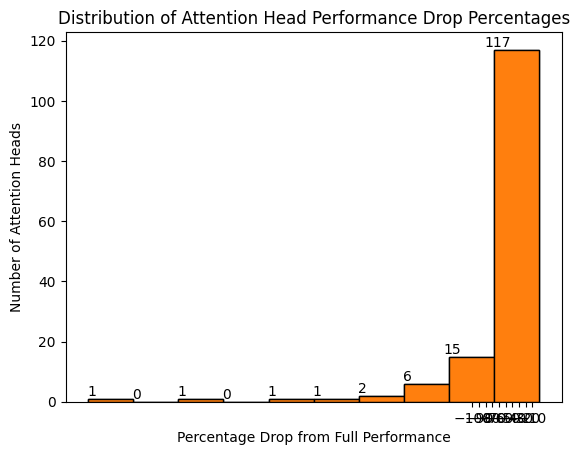

In [37]:
lh_scores_drop = {key: min(0, val-100) for key, val in lh_scores_t.items()}
scores = list(lh_scores_drop.values())
plt.hist(scores, bins=10, edgecolor='black')
n, bins, patches = plt.hist(scores, bins=10, edgecolor='black')

for i in range(len(n)):
    plt.text(bins[i]+5, n[i], str(int(n[i])), va='bottom', ha='center')

plt.xticks(range(-100, 0, 10))
plt.xlabel('Percentage Drop from Full Performance')
plt.ylabel('Number of Attention Heads')
plt.title('Distribution of Attention Head Performance Drop Percentages')

plt.show()

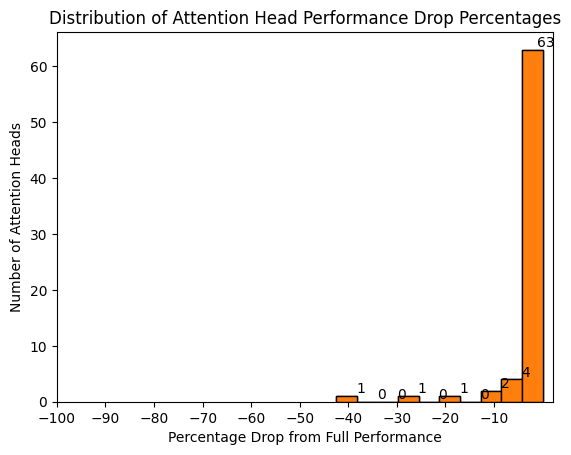

In [38]:
lh_scores_drop = {key: min(0, val-100) for key, val in lh_scores_s.items()}
scores = list(lh_scores_drop.values())
plt.hist(scores, bins=10, edgecolor='black')
n, bins, patches = plt.hist(scores, bins=10, edgecolor='black')

for i in range(len(n)):
    plt.text(bins[i]+5, n[i], str(int(n[i])), va='bottom', ha='center')

plt.xticks(range(-100, 0, 10))
plt.xlabel('Percentage Drop from Full Performance')
plt.ylabel('Number of Attention Heads')
plt.title('Distribution of Attention Head Performance Drop Percentages')

plt.show()

In [39]:
# average logit diff of ablating each MLP:

scores_mlp_t = []
scores_mlp_s = []

for i in range(12):
    lst = [layer for layer in range(12) if layer != i]
    perc_of_orig = ablate_MLP_from_full(lst, teacher, dataset, dataset_2, orig_score_t, print_output=False).item()
    scores_mlp_t.append((i, -round(100 - perc_of_orig, 2)))

for i in range(6):
    lst = [layer for layer in range(6) if layer != i]
    perc_of_orig = ablate_MLP_from_full(lst, student, dataset, dataset_2, orig_score_s, print_output=False).item()
    if i == 0:
        print(f"perc of orig: {perc_of_orig}")
    scores_mlp_s.append((i, -round(100 - perc_of_orig, 2)))

perc of orig: 93.76383972167969


In [40]:
scores_combined_t = scores_mlp_t + scores_attn_t
scores_combined_s = scores_mlp_s + scores_attn_s

# Match components across networks

## Match heads

In [41]:
def viz_attnPat_dupl_t(
    layer, head_index,
    highlightLines = True
):
    patterns = local_cache_t["attn", layer][:, head_index].mean(dim=0)
    patterns_np = patterns.cpu().numpy()

    str_tokens = teacher.to_str_tokens(tokens_t[0])
    str_tokens[0] = '<END>'

    mask = np.triu(np.ones_like(patterns_np, dtype=bool), k=1)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        patterns_np,
        xticklabels=str_tokens,
        yticklabels=str_tokens,
        # cmap='viridis',
        cmap = 'inferno',
        annot=False,
        fmt='.2f',
        linewidths=0.1,
        linecolor='white',
        # cbar_kws={'label': 'Attention Weight'}
        mask=mask
    )

    ax.set_xlabel('Key', fontsize=16, fontweight='bold')
    ax.set_ylabel('Query', fontsize=16, fontweight='bold')

    if highlightLines:
        import matplotlib.patches as mpatches

        for i in range(0, 19):
            rect = mpatches.Rectangle((i, i), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = mpatches.Rectangle((i, i+5), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = mpatches.Rectangle((i, i+10), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.show()

def viz_attnPat_dupl_s(
    layer, head_index,
    highlightLines = True
):
    patterns = local_cache_s["attn", layer][:, head_index].mean(dim=0)
    patterns_np = patterns.cpu().numpy()

    str_tokens = student.to_str_tokens(tokens_s[0])
    str_tokens[0] = '<END>'

    mask = np.triu(np.ones_like(patterns_np, dtype=bool), k=1)

    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        patterns_np,
        xticklabels=str_tokens,
        yticklabels=str_tokens,
        # cmap='viridis',
        cmap = 'inferno',
        annot=False,
        fmt='.2f',
        linewidths=0.1,
        linecolor='white',
        # cbar_kws={'label': 'Attention Weight'}
        mask=mask
    )

    ax.set_xlabel('Key', fontsize=16, fontweight='bold')
    ax.set_ylabel('Query', fontsize=16, fontweight='bold')

    if highlightLines:
        import matplotlib.patches as mpatches

        for i in range(0, 19):
            rect = mpatches.Rectangle((i, i), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = mpatches.Rectangle((i, i+5), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)
            rect = mpatches.Rectangle((i, i+10), 1, 1, linewidth=3.5, edgecolor='lime', facecolor='none')
            ax.add_patch(rect)

    plt.show()



In [42]:
import torch
import torch.nn.functional as F

sims = {}
max_vals_attn = {}

for student_layer in range(6):
    for student_head in range(12):
        curr_comb = (student_layer, student_head)
        if curr_comb not in max_vals_attn.keys():
            max_vals_attn[curr_comb] = (None, 0)
        for teacher_layer in range(12):
            for teacher_head in range(12):
                curr_s = local_cache_s["attn", student_layer][:, student_head].mean(dim=0)
                curr_t = local_cache_t["attn", teacher_layer][:, teacher_head].mean(dim=0)
                sim = torch.mean(F.cosine_similarity(curr_s.unsqueeze(1), curr_t.unsqueeze(1), dim=2))
                if sim >= max_vals_attn[curr_comb][1]:
                    max_vals_attn[curr_comb] = ((teacher_layer, teacher_head), sim)
                sims[(student_layer, student_head, teacher_layer, teacher_head)] = sim


In [43]:
student_layer = 4
student_head = 11
teacher_layer = 9
teacher_head = 11

print(f"Similarity between TL{teacher_layer}H{teacher_head}/SL{student_layer}H{student_head}: {sims[(student_layer, student_head, teacher_layer, teacher_head)]}")

mean_val = torch.mean(torch.stack(list(sims.values())))
print(f"Mean similarity across all heads: {mean_val}")


Similarity between TL9H11/SL4H11: 0.9407109618186951
Mean similarity across all heads: 0.6931097507476807


In [44]:
sims

{(0, 0, 0, 0): tensor(0.9044, device='cuda:0'),
 (0, 0, 0, 1): tensor(0.3475, device='cuda:0'),
 (0, 0, 0, 2): tensor(0.8394, device='cuda:0'),
 (0, 0, 0, 3): tensor(0.3392, device='cuda:0'),
 (0, 0, 0, 4): tensor(0.4827, device='cuda:0'),
 (0, 0, 0, 5): tensor(0.6031, device='cuda:0'),
 (0, 0, 0, 6): tensor(0.9240, device='cuda:0'),
 (0, 0, 0, 7): tensor(0.3914, device='cuda:0'),
 (0, 0, 0, 8): tensor(0.5729, device='cuda:0'),
 (0, 0, 0, 9): tensor(0.8689, device='cuda:0'),
 (0, 0, 0, 10): tensor(0.7985, device='cuda:0'),
 (0, 0, 0, 11): tensor(0.8875, device='cuda:0'),
 (0, 0, 1, 0): tensor(0.6306, device='cuda:0'),
 (0, 0, 1, 1): tensor(0.7296, device='cuda:0'),
 (0, 0, 1, 2): tensor(0.7324, device='cuda:0'),
 (0, 0, 1, 3): tensor(0.8606, device='cuda:0'),
 (0, 0, 1, 4): tensor(0.9523, device='cuda:0'),
 (0, 0, 1, 5): tensor(0.7449, device='cuda:0'),
 (0, 0, 1, 6): tensor(0.9349, device='cuda:0'),
 (0, 0, 1, 7): tensor(0.9569, device='cuda:0'),
 (0, 0, 1, 8): tensor(0.9411, device='

## Match MLPs

In [45]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

def visualise_mlps(teacher_layer, student_layer):
    teacher_acts = np.array(local_cache_t[f'blocks.{teacher_layer}.hook_mlp_out'].cpu())
    student_acts = np.array(local_cache_s[f'blocks.{student_layer}.hook_mlp_out'].cpu())

    teacher_mean_acts = np.mean(teacher_acts, axis=0)
    student_mean_acts = np.mean(student_acts, axis=0)

    pca = PCA(n_components=2)
    combined_acts = np.vstack([teacher_mean_acts, student_mean_acts])
    pca.fit(combined_acts)

    teacher_pca = pca.transform(teacher_mean_acts)
    student_pca = pca.transform(student_mean_acts)

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=teacher_pca[:, 0],
        y=teacher_pca[:, 1],
        mode='markers+text',
        text=[f"{i}" for i in range(len(teacher_pca))],
        textposition="top center",
        marker=dict(color='blue', size=10, opacity=0.7),
        name=f'Teacher (MLP{teacher_layer})'
    ))

    fig.add_trace(go.Scatter(
        x=student_pca[:, 0],
        y=student_pca[:, 1],
        mode='markers+text',
        text=[f"{i}" for i in range(len(student_pca))],
        textposition="top center",
        marker=dict(color='green', size=10, opacity=0.7),
        name=f'Student (MLP{student_layer})'
    ))

    fig.update_layout(
        title="PCA Projection of Mean MLP Activations per Token",
        xaxis_title="PCA Component 1",
        yaxis_title="PCA Component 2",
        font=dict(size=16),
        hovermode="closest",
        template="plotly_white"
    )

    fig.show()

In [46]:
import numpy as np
from scipy.linalg import svd
from sklearn.metrics.pairwise import cosine_similarity

# computes similarity between eigenvectors of activation matrices from two layers.
def activation_eigenvector_similarity(layer1, layer2, k=3):
    acts1 = np.array(local_cache_t[f'blocks.{layer1}.hook_mlp_out'].cpu())
    acts2 = np.array(local_cache_s[f'blocks.{layer2}.hook_mlp_out'].cpu())

    acts1_flattened = acts1.reshape(-1, acts1.shape[-1])
    acts2_flattened = acts2.reshape(-1, acts2.shape[-1])

    cov1 = np.dot(acts1_flattened.T, acts1_flattened) / acts1_flattened.shape[0] # covariance matrices
    cov2 = np.dot(acts2_flattened.T, acts2_flattened) / acts2_flattened.shape[0]

    # get eigenvectors with singular value decomp
    U1, _, _ = svd(cov1)
    U2, _, _ = svd(cov2)
    U1_topk = U1[:, :k]
    U2_topk = U2[:, :k]

    similarity_matrix = cosine_similarity(U1_topk.T, U2_topk.T)
    avg_similarity = np.mean(similarity_matrix)

    return avg_similarity

In [47]:
sims_mlp = {}

for i in range(0, 6):
    for j in range(0, 12):
        curr_sim = abs(activation_eigenvector_similarity(j, i))
        sims_mlp[(i, j)] = curr_sim

In [48]:
sims_mlp

{(0, 0): 0.06131751,
 (0, 1): 0.04148237,
 (0, 2): 0.05719728,
 (0, 3): 0.102908455,
 (0, 4): 0.09475615,
 (0, 5): 0.06671589,
 (0, 6): 0.06418428,
 (0, 7): 0.00024968592,
 (0, 8): 0.068062745,
 (0, 9): 0.06782201,
 (0, 10): 0.043940425,
 (0, 11): 0.17141283,
 (1, 0): 0.068594195,
 (1, 1): 0.098418765,
 (1, 2): 0.12971103,
 (1, 3): 0.10939158,
 (1, 4): 0.1340333,
 (1, 5): 0.09662477,
 (1, 6): 0.12639888,
 (1, 7): 0.022838552,
 (1, 8): 0.114142925,
 (1, 9): 0.0880222,
 (1, 10): 0.0701484,
 (1, 11): 0.07293343,
 (2, 0): 0.06327141,
 (2, 1): 0.10563844,
 (2, 2): 0.12413529,
 (2, 3): 0.09955052,
 (2, 4): 0.11059153,
 (2, 5): 0.13382703,
 (2, 6): 0.15644749,
 (2, 7): 0.052178126,
 (2, 8): 0.1370986,
 (2, 9): 0.12712282,
 (2, 10): 0.08772898,
 (2, 11): 0.07663421,
 (3, 0): 0.043402962,
 (3, 1): 0.04962443,
 (3, 2): 0.036270782,
 (3, 3): 0.027339606,
 (3, 4): 0.045422375,
 (3, 5): 0.08993365,
 (3, 6): 0.16351163,
 (3, 7): 0.10624186,
 (3, 8): 0.20974045,
 (3, 9): 0.18565947,
 (3, 10): 0.08706

9, 4 is maybe just similar enough, 9, 3 is definitely similar, so is (6, 1). (10, 5) is not.

In [49]:
# normalise MLP and attn. head similarities to be on the same scale

import torch
import numpy as np

mlp_keys = [k for k, v in sims_mlp.items() if v > 0]
mlp_values = np.array([v for v in sims_mlp.values() if v > 0])

attn_values = torch.tensor([v.item() for v in sims.values()])

mlp_mean, mlp_std = np.mean(mlp_values), np.std(mlp_values)
attn_mean, attn_std = torch.mean(attn_values), torch.std(attn_values)

if mlp_values.size > 0:
    mlp_min, mlp_max = np.min(mlp_values), np.max(mlp_values)
else:
    mlp_min, mlp_max = 0, 0
if attn_values.numel() > 0:
    attn_min, attn_max = torch.min(attn_values), torch.max(attn_values)
else:
    attn_min, attn_max = 0, 0

mlp_values_normalized = ((mlp_values - mlp_mean) / mlp_std) * attn_std.item() + attn_mean.item()

mlp_adjusted_values = mlp_values_normalized

sims_mlp_adjusted = {k: v for k, v in zip(mlp_keys, mlp_adjusted_values)}

sims_mlp_adjusted.update({k: 0 for k in sims_mlp if k not in sims_mlp_adjusted})

max_val = max(sims_mlp_adjusted.values())

if max_val == 0:
    sim_mlp_scaled = {key: 0 for key in sims_mlp_adjusted.keys()}
else:
    sim_mlp_scaled = {key: val / max_val for key, val in sims_mlp_adjusted.items()}




In [50]:
sim_mlp_scaled

{(0, 0): 0.40141907,
 (0, 1): 0.32142514,
 (0, 2): 0.38480243,
 (0, 3): 0.5691529,
 (0, 4): 0.53627515,
 (0, 5): 0.42319041,
 (0, 6): 0.4129806,
 (0, 7): 0.15513615,
 (0, 8): 0.4286222,
 (0, 9): 0.42765132,
 (0, 10): 0.33133835,
 (0, 11): 0.845427,
 (1, 0): 0.4307655,
 (1, 1): 0.55104625,
 (1, 2): 0.67724615,
 (1, 3): 0.59529895,
 (1, 4): 0.6946776,
 (1, 5): 0.54381114,
 (1, 6): 0.6638884,
 (1, 7): 0.24623573,
 (1, 8): 0.6144608,
 (1, 9): 0.50911754,
 (1, 10): 0.43703353,
 (1, 11): 0.4482654,
 (2, 0): 0.40929905,
 (2, 1): 0.58016276,
 (2, 2): 0.65475947,
 (2, 3): 0.55561054,
 (2, 4): 0.60013825,
 (2, 5): 0.6938457,
 (2, 6): 0.7850727,
 (2, 7): 0.36456048,
 (2, 8): 0.7070397,
 (2, 9): 0.666808,
 (2, 10): 0.507935,
 (2, 11): 0.46319044,
 (3, 0): 0.32917076,
 (3, 1): 0.35426158,
 (3, 2): 0.3004071,
 (3, 3): 0.2643882,
 (3, 4): 0.33731496,
 (3, 5): 0.5168263,
 (3, 6): 0.8135619,
 (3, 7): 0.5825963,
 (3, 8): 1.0,
 (3, 9): 0.9028828,
 (3, 10): 0.5052412,
 (3, 11): 0.5106944,
 (4, 0): 0.33770

In [51]:
sims_mlp = sim_mlp_scaled

In [52]:
max_vals_mlp = {}

for (i, j), val in sims_mlp.items():
    if i not in max_vals_mlp or val > max_vals_mlp[i][1]:
        max_vals_mlp[i] = (j, val)

max_vals_mlp

{0: (11, 0.845427),
 1: (4, 0.6946776),
 2: (6, 0.7850727),
 3: (8, 1.0),
 4: (8, 0.7332851),
 5: (10, 0.95669293)}

In [53]:
visualise_mlps(9, 3)

In [54]:
!pip install nbformat

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable


# Calculating Model Divergence

In [55]:
component_influence_teacher = scores_combined_t
component_influence_student = scores_combined_s

In [56]:
attn_matches = max_vals_attn
mlp_matches = max_vals_mlp
print(sorted(attn_matches.items(), key=lambda x: x[1][1], reverse=True))
print(sorted(mlp_matches.items(), key=lambda x: x[1][1], reverse=True))

[((4, 5), ((9, 5), tensor(0.9994, device='cuda:0'))), ((2, 10), ((6, 2), tensor(0.9984, device='cuda:0'))), ((5, 2), ((8, 0), tensor(0.9980, device='cuda:0'))), ((1, 11), ((9, 5), tensor(0.9979, device='cuda:0'))), ((5, 6), ((10, 6), tensor(0.9975, device='cuda:0'))), ((1, 7), ((4, 10), tensor(0.9956, device='cuda:0'))), ((3, 6), ((7, 6), tensor(0.9942, device='cuda:0'))), ((3, 4), ((8, 9), tensor(0.9937, device='cuda:0'))), ((3, 5), ((8, 9), tensor(0.9929, device='cuda:0'))), ((2, 2), ((7, 6), tensor(0.9926, device='cuda:0'))), ((4, 6), ((10, 6), tensor(0.9913, device='cuda:0'))), ((2, 4), ((9, 5), tensor(0.9891, device='cuda:0'))), ((5, 7), ((8, 0), tensor(0.9877, device='cuda:0'))), ((5, 1), ((11, 6), tensor(0.9877, device='cuda:0'))), ((5, 3), ((11, 6), tensor(0.9870, device='cuda:0'))), ((3, 3), ((7, 9), tensor(0.9865, device='cuda:0'))), ((3, 1), ((7, 6), tensor(0.9864, device='cuda:0'))), ((1, 1), ((2, 11), tensor(0.9863, device='cuda:0'))), ((2, 8), ((7, 6), tensor(0.9837, devi

In [57]:
teacher_influences = {comp: abs(score) for comp, score in component_influence_teacher}
student_influences = {comp: abs(score) for comp, score in component_influence_student}
teacher_probs, student_probs = teacher_influences, student_influences



In [58]:
attn_sims = []

In [59]:
def simple_threshold(matches, type, threshold_attn=0.95, threshold_mlp=0.12):
    if type == "attn":
        filtered_pairs = [match for match in matches if float(match[1][1].item()) >= threshold_attn]
    elif type == 'mlp':
        filtered_pairs = [match for match in matches if float(match[1][1]) >= threshold_mlp]
    return filtered_pairs

In [60]:
attn_matches

{(0, 0): ((1, 7), tensor(0.9569, device='cuda:0')),
 (0, 1): ((0, 1), tensor(0.6370, device='cuda:0')),
 (0, 2): ((1, 6), tensor(0.9644, device='cuda:0')),
 (0, 3): ((0, 3), tensor(0.9035, device='cuda:0')),
 (0, 4): ((4, 7), tensor(0.8301, device='cuda:0')),
 (0, 5): ((0, 1), tensor(0.6493, device='cuda:0')),
 (0, 6): ((1, 8), tensor(0.9069, device='cuda:0')),
 (0, 7): ((2, 5), tensor(0.9163, device='cuda:0')),
 (0, 8): ((0, 9), tensor(0.9660, device='cuda:0')),
 (0, 9): ((1, 6), tensor(0.9703, device='cuda:0')),
 (0, 10): ((0, 11), tensor(0.8539, device='cuda:0')),
 (0, 11): ((0, 11), tensor(0.9158, device='cuda:0')),
 (1, 0): ((2, 3), tensor(0.8758, device='cuda:0')),
 (1, 1): ((2, 11), tensor(0.9863, device='cuda:0')),
 (1, 2): ((2, 5), tensor(0.8714, device='cuda:0')),
 (1, 3): ((2, 0), tensor(0.8845, device='cuda:0')),
 (1, 4): ((5, 4), tensor(0.9158, device='cuda:0')),
 (1, 5): ((0, 7), tensor(0.8946, device='cuda:0')),
 (1, 6): ((1, 1), tensor(0.9220, device='cuda:0')),
 (1, 7)

In [61]:
filtered_attn = simple_threshold(attn_matches.items(), type="attn")
#filtered_attn

matched_attn_sim = set(attn_matches.items())
unmatched_attn_sim = set(attn_matches.items()) - set(filtered_attn)

filtered_attn_list = [x[0] for x in filtered_attn]

In [62]:
matched_attn_sim

{((0, 0), ((1, 7), tensor(0.9569, device='cuda:0'))),
 ((0, 1), ((0, 1), tensor(0.6370, device='cuda:0'))),
 ((0, 2), ((1, 6), tensor(0.9644, device='cuda:0'))),
 ((0, 3), ((0, 3), tensor(0.9035, device='cuda:0'))),
 ((0, 4), ((4, 7), tensor(0.8301, device='cuda:0'))),
 ((0, 5), ((0, 1), tensor(0.6493, device='cuda:0'))),
 ((0, 6), ((1, 8), tensor(0.9069, device='cuda:0'))),
 ((0, 7), ((2, 5), tensor(0.9163, device='cuda:0'))),
 ((0, 8), ((0, 9), tensor(0.9660, device='cuda:0'))),
 ((0, 9), ((1, 6), tensor(0.9703, device='cuda:0'))),
 ((0, 10), ((0, 11), tensor(0.8539, device='cuda:0'))),
 ((0, 11), ((0, 11), tensor(0.9158, device='cuda:0'))),
 ((1, 0), ((2, 3), tensor(0.8758, device='cuda:0'))),
 ((1, 1), ((2, 11), tensor(0.9863, device='cuda:0'))),
 ((1, 2), ((2, 5), tensor(0.8714, device='cuda:0'))),
 ((1, 3), ((2, 0), tensor(0.8845, device='cuda:0'))),
 ((1, 4), ((5, 4), tensor(0.9158, device='cuda:0'))),
 ((1, 5), ((0, 7), tensor(0.8946, device='cuda:0'))),
 ((1, 6), ((1, 1), tens

In [63]:
unmatched_attn_sim

{((0, 1), ((0, 1), tensor(0.6370, device='cuda:0'))),
 ((0, 3), ((0, 3), tensor(0.9035, device='cuda:0'))),
 ((0, 4), ((4, 7), tensor(0.8301, device='cuda:0'))),
 ((0, 5), ((0, 1), tensor(0.6493, device='cuda:0'))),
 ((0, 6), ((1, 8), tensor(0.9069, device='cuda:0'))),
 ((0, 7), ((2, 5), tensor(0.9163, device='cuda:0'))),
 ((0, 10), ((0, 11), tensor(0.8539, device='cuda:0'))),
 ((0, 11), ((0, 11), tensor(0.9158, device='cuda:0'))),
 ((1, 0), ((2, 3), tensor(0.8758, device='cuda:0'))),
 ((1, 2), ((2, 5), tensor(0.8714, device='cuda:0'))),
 ((1, 3), ((2, 0), tensor(0.8845, device='cuda:0'))),
 ((1, 4), ((5, 4), tensor(0.9158, device='cuda:0'))),
 ((1, 5), ((0, 7), tensor(0.8946, device='cuda:0'))),
 ((1, 6), ((1, 1), tensor(0.9220, device='cuda:0'))),
 ((1, 8), ((2, 5), tensor(0.8489, device='cuda:0'))),
 ((1, 9), ((2, 9), tensor(0.8039, device='cuda:0'))),
 ((2, 0), ((5, 2), tensor(0.8978, device='cuda:0'))),
 ((2, 1), ((1, 1), tensor(0.8511, device='cuda:0'))),
 ((2, 3), ((7, 0), tenso

In [64]:
mlp_matches.items()

dict_items([(0, (11, 0.845427)), (1, (4, 0.6946776)), (2, (6, 0.7850727)), (3, (8, 1.0)), (4, (8, 0.7332851)), (5, (10, 0.95669293))])

In [65]:
filtered_mlp = simple_threshold(mlp_matches.items(), type="mlp")

matched_mlp_sim = set(filtered_mlp)
unmatched_mlp_sim = set(mlp_matches.items()) - set(filtered_mlp)

filtered_mlp_list = [a[0] for a in filtered_mlp]
filtered_mlp_list


[0, 1, 2, 3, 4, 5]

In [66]:
matched_mlp_sim

{(0, (11, 0.845427)),
 (1, (4, 0.6946776)),
 (2, (6, 0.7850727)),
 (3, (8, 1.0)),
 (4, (8, 0.7332851)),
 (5, (10, 0.95669293))}

In [67]:
unmatched_mlp_sim

set()

In [68]:
matched = list(matched_attn_sim) + list(matched_mlp_sim)
unmatched = list(unmatched_attn_sim) + list(unmatched_mlp_sim)

In [69]:
matched

[((3, 6), ((7, 6), tensor(0.9942, device='cuda:0'))),
 ((1, 10), ((6, 6), tensor(0.9727, device='cuda:0'))),
 ((4, 1), ((7, 10), tensor(0.8997, device='cuda:0'))),
 ((2, 5), ((6, 0), tensor(0.9388, device='cuda:0'))),
 ((0, 5), ((0, 1), tensor(0.6493, device='cuda:0'))),
 ((2, 0), ((5, 2), tensor(0.8978, device='cuda:0'))),
 ((3, 8), ((5, 4), tensor(0.9276, device='cuda:0'))),
 ((4, 0), ((10, 6), tensor(0.9803, device='cuda:0'))),
 ((4, 8), ((5, 0), tensor(0.9636, device='cuda:0'))),
 ((5, 3), ((11, 6), tensor(0.9870, device='cuda:0'))),
 ((2, 1), ((1, 1), tensor(0.8511, device='cuda:0'))),
 ((0, 1), ((0, 1), tensor(0.6370, device='cuda:0'))),
 ((2, 4), ((9, 5), tensor(0.9891, device='cuda:0'))),
 ((2, 7), ((0, 4), tensor(0.8868, device='cuda:0'))),
 ((3, 2), ((5, 5), tensor(0.9310, device='cuda:0'))),
 ((4, 10), ((7, 9), tensor(0.9451, device='cuda:0'))),
 ((0, 10), ((0, 11), tensor(0.8539, device='cuda:0'))),
 ((0, 4), ((4, 7), tensor(0.8301, device='cuda:0'))),
 ((2, 6), ((6, 7), te

In [70]:
unmatched

[((4, 1), ((7, 10), tensor(0.8997, device='cuda:0'))),
 ((3, 8), ((5, 4), tensor(0.9276, device='cuda:0'))),
 ((2, 5), ((6, 0), tensor(0.9388, device='cuda:0'))),
 ((0, 5), ((0, 1), tensor(0.6493, device='cuda:0'))),
 ((2, 0), ((5, 2), tensor(0.8978, device='cuda:0'))),
 ((2, 1), ((1, 1), tensor(0.8511, device='cuda:0'))),
 ((0, 1), ((0, 1), tensor(0.6370, device='cuda:0'))),
 ((2, 7), ((0, 4), tensor(0.8868, device='cuda:0'))),
 ((3, 2), ((5, 5), tensor(0.9310, device='cuda:0'))),
 ((4, 10), ((7, 9), tensor(0.9451, device='cuda:0'))),
 ((0, 10), ((0, 11), tensor(0.8539, device='cuda:0'))),
 ((0, 4), ((4, 7), tensor(0.8301, device='cuda:0'))),
 ((0, 3), ((0, 3), tensor(0.9035, device='cuda:0'))),
 ((2, 3), ((7, 0), tensor(0.7818, device='cuda:0'))),
 ((5, 5), ((9, 2), tensor(0.9308, device='cuda:0'))),
 ((5, 8), ((1, 10), tensor(0.8389, device='cuda:0'))),
 ((1, 8), ((2, 5), tensor(0.8489, device='cuda:0'))),
 ((3, 0), ((7, 8), tensor(0.9016, device='cuda:0'))),
 ((2, 11), ((4, 11), te

In [71]:
all_sims = matched + unmatched
matched_norm = [
    (entry[0], (entry[1][0], entry[1][1]))
    for entry in matched
]

unmatched_norm = [
    (entry[0], (entry[1][0], entry[1][1]))
    for entry in unmatched
]

In [72]:
matched_norm

[((3, 6), ((7, 6), tensor(0.9942, device='cuda:0'))),
 ((1, 10), ((6, 6), tensor(0.9727, device='cuda:0'))),
 ((4, 1), ((7, 10), tensor(0.8997, device='cuda:0'))),
 ((2, 5), ((6, 0), tensor(0.9388, device='cuda:0'))),
 ((0, 5), ((0, 1), tensor(0.6493, device='cuda:0'))),
 ((2, 0), ((5, 2), tensor(0.8978, device='cuda:0'))),
 ((3, 8), ((5, 4), tensor(0.9276, device='cuda:0'))),
 ((4, 0), ((10, 6), tensor(0.9803, device='cuda:0'))),
 ((4, 8), ((5, 0), tensor(0.9636, device='cuda:0'))),
 ((5, 3), ((11, 6), tensor(0.9870, device='cuda:0'))),
 ((2, 1), ((1, 1), tensor(0.8511, device='cuda:0'))),
 ((0, 1), ((0, 1), tensor(0.6370, device='cuda:0'))),
 ((2, 4), ((9, 5), tensor(0.9891, device='cuda:0'))),
 ((2, 7), ((0, 4), tensor(0.8868, device='cuda:0'))),
 ((3, 2), ((5, 5), tensor(0.9310, device='cuda:0'))),
 ((4, 10), ((7, 9), tensor(0.9451, device='cuda:0'))),
 ((0, 10), ((0, 11), tensor(0.8539, device='cuda:0'))),
 ((0, 4), ((4, 7), tensor(0.8301, device='cuda:0'))),
 ((2, 6), ((6, 7), te

In [73]:
student_matched = []
student_unmatched = []

for student_comp, (teacher_comp, similarity) in matched_norm:
    try:
        student_matched.append((student_probs[student_comp], teacher_probs[teacher_comp], similarity.item()))
    except:
        student_matched.append((student_probs[student_comp], teacher_probs[teacher_comp], similarity))

for student_comp, (teacher_comp, similarity) in unmatched_norm:
    try:
        student_unmatched.append((student_probs[student_comp], teacher_probs[teacher_comp], similarity.item()))
    except:
        student_unmatched.append((student_probs[student_comp], teacher_probs[teacher_comp], similarity))

In [74]:
student_unmatched

[(14.12, 22.96, 0.899725615978241),
 (0.84, 38.05, 0.9276236295700073),
 (1.04, 50.62, 0.9388439059257507),
 (8.9, 391.79, 0.6493339538574219),
 (1.4, 35.6, 0.8978079557418823),
 (1.13, 119.8, 0.851052463054657),
 (35.8, 391.79, 0.6369627118110657),
 (11.69, 58.68, 0.8868452906608582),
 (8.14, 12.89, 0.9309921264648438),
 (0.06, 6.34, 0.9451131224632263),
 (27.15, 18.45, 0.8539299964904785),
 (2.44, 24.28, 0.8300559520721436),
 (2.62, 134.94, 0.9035258293151855),
 (5.61, 13.51, 0.7818295359611511),
 (0.42, 31.43, 0.930790901184082),
 (0.94, 172.05, 0.8389458060264587),
 (0.09, 43.57, 0.848911702632904),
 (0.29, 82.99, 0.9015862941741943),
 (9.53, 43.71, 0.8402113914489746),
 (1.64, 9.37, 0.8844884634017944),
 (0.61, 43.57, 0.8713776469230652),
 (2.63, 12.89, 0.9498226642608643),
 (0.92, 113.15, 0.7645859718322754),
 (0.49, 135.81, 0.9010379314422607),
 (19.28, 82.0, 0.806771457195282),
 (5.66, 79.34, 0.9466482400894165),
 (2.56, 26.01, 0.875796914100647),
 (19.87, 82.0, 0.8651351928710

In [75]:
student_matched

[(0.78, 60.89, 0.9942015409469604),
 (0.62, 28.09, 0.972732424736023),
 (14.12, 22.96, 0.899725615978241),
 (1.04, 50.62, 0.9388439059257507),
 (8.9, 391.79, 0.6493339538574219),
 (1.4, 35.6, 0.8978079557418823),
 (0.84, 38.05, 0.9276236295700073),
 (0.02, 6.35, 0.9803107976913452),
 (0.17, 35.39, 0.9636293649673462),
 (0.2, 0.37, 0.9870314598083496),
 (1.13, 119.8, 0.851052463054657),
 (35.8, 391.79, 0.6369627118110657),
 (17.48, 61.98, 0.9890768527984619),
 (11.69, 58.68, 0.8868452906608582),
 (8.14, 12.89, 0.9309921264648438),
 (0.06, 6.34, 0.9451131224632263),
 (27.15, 18.45, 0.8539299964904785),
 (2.44, 24.28, 0.8300559520721436),
 (0.95, 20.43, 0.974360466003418),
 (2.62, 134.94, 0.9035258293151855),
 (0.7, 61.98, 0.9994322657585144),
 (0.82, 6.35, 0.9913150668144226),
 (1.2, 59.48, 0.9644384384155273),
 (0.28, 6.34, 0.9864624738693237),
 (0.9, 135.81, 0.9569215178489685),
 (5.61, 13.51, 0.7818295359611511),
 (42.51, 69.8, 0.9778677821159363),
 (0.42, 31.43, 0.930790901184082),
 

In [76]:
all_student = student_unmatched + student_matched

In [77]:
all_student

[(14.12, 22.96, 0.899725615978241),
 (0.84, 38.05, 0.9276236295700073),
 (1.04, 50.62, 0.9388439059257507),
 (8.9, 391.79, 0.6493339538574219),
 (1.4, 35.6, 0.8978079557418823),
 (1.13, 119.8, 0.851052463054657),
 (35.8, 391.79, 0.6369627118110657),
 (11.69, 58.68, 0.8868452906608582),
 (8.14, 12.89, 0.9309921264648438),
 (0.06, 6.34, 0.9451131224632263),
 (27.15, 18.45, 0.8539299964904785),
 (2.44, 24.28, 0.8300559520721436),
 (2.62, 134.94, 0.9035258293151855),
 (5.61, 13.51, 0.7818295359611511),
 (0.42, 31.43, 0.930790901184082),
 (0.94, 172.05, 0.8389458060264587),
 (0.09, 43.57, 0.848911702632904),
 (0.29, 82.99, 0.9015862941741943),
 (9.53, 43.71, 0.8402113914489746),
 (1.64, 9.37, 0.8844884634017944),
 (0.61, 43.57, 0.8713776469230652),
 (2.63, 12.89, 0.9498226642608643),
 (0.92, 113.15, 0.7645859718322754),
 (0.49, 135.81, 0.9010379314422607),
 (19.28, 82.0, 0.806771457195282),
 (5.66, 79.34, 0.9466482400894165),
 (2.56, 26.01, 0.875796914100647),
 (19.87, 82.0, 0.8651351928710

In [78]:
print(f"Teacher performance: {orig_score_t}")
print(f"Student performance: {orig_score_s}")
print(f"Performance drop: {orig_score_t - orig_score_s}")
print(f"Mean performance: {(orig_score_t + orig_score_s) / 2}")

Teacher performance: 0.2201818823814392
Student performance: -1.824190378189087
Performance drop: 2.044372320175171
Mean performance: -0.8020042181015015


In [79]:
# scale influences by length of pairs
all_student_scaled = all_student.copy()

for i in range(len(all_student)):
    (I_S, I_T, S) = all_student[i]
    all_student_scaled[i] = (I_S * len(all_student), I_T * len(all_student), S)

all_student_normalised = all_student.copy()
sum_I_T = sum(I_T for _, I_T, _ in all_student)
sum_I_S = sum(I_S for I_S, _, _ in all_student)
for i in range(len(all_student_normalised)):
    (I_S, I_T, S) = all_student[i]
    all_student_normalised[i] = (I_S / sum_I_S, I_T / sum_I_T, S)
    
# normalise scaled influences
all_student_scaled_normalised = all_student_normalised.copy()
sum_I_T = sum(I_T for _, I_T, _ in all_student_normalised)
sum_I_S = sum(I_S for I_S, _, _ in all_student_normalised)
for i in range(len(all_student_scaled_normalised)):
    (I_S, I_T, S) = all_student_normalised[i]
    all_student_scaled_normalised[i] = (I_S * len(all_student), I_T * len(all_student), S)

all_student_scaled_normalised

[(2.9405918889294864, 0.2992481753160041, 0.899725615978241),
 (0.17493606138107426, 0.49592304315217567, 0.9276236295700073),
 (0.21658750456704431, 0.6597535990634201, 0.9388439059257507),
 (1.853489221775668, 5.106378162328277, 0.6493339538574219),
 (0.2915601023017904, 0.46399107322516314, 0.8978079557418823),
 (0.2353306540007308, 1.5614081621453522, 0.851052463054657),
 (7.455608330288641, 5.106378162328277, 0.6369627118110657),
 (2.43452685421995, 0.7648032633947351, 0.8868452906608582),
 (1.6952137376689815, 0.16800126218742564, 0.9309921264648438),
 (0.012495432955791017, 0.08263211809684085, 0.9451131224632263),
 (5.654183412495435, 0.2404672837360747, 0.8539299964904785),
 (0.5081476068688348, 0.3164523387052517, 0.8300559520721436),
 (0.5456339057362078, 1.7587347028371771, 0.9035258293151855),
 (1.1683229813664602, 0.1760820055975268, 0.7818295359611511),
 (0.08746803069053713, 0.4096415570636763, 0.930790901184082),
 (0.19576178297405925, 2.242406296303071, 0.838945806026

In [80]:
def alignment(pairs):
    return sum(S * (1 - abs(I_S - I_T)) for I_S, I_T, S in pairs) / len(pairs)

In [81]:
print(f"Alignment score: {round(alignment(all_student_normalised), 4)}")

Alignment score: 0.8954
